# Exploring Financial Data using Nasdaq Data Link API

In [1]:
#importing necessary libraries together with the config.py file

import requests
import json
import pandas as pd
import config

# configuring the api_key
api_key = config.api_key



In [2]:
# base url

api_url='https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

# our `parameters` dictionary

parameters = {
    'api_key': api_key,
    'qopts.per_page': 10  # Number of rows to fetch

}

# Fetching the data and converting it to json

json_data=requests.get(api_url, params=parameters).json()

# printing the json data

print(json_data)



{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2022-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2022-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

## Processing the JSON Data into a DataFrame

In [3]:

api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10000  

}
json_data=requests.get(api_url, params=parameters).json()

data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

# Create DataFrame from a list of list
df_metric = pd.DataFrame(data, columns=columns)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2022-12-31,Accrued Expenses Turnover,Derived


## Understanding the Dataset

In [4]:
necessary_columns=['reportid','reportdate','reporttype','amount','longname','country','region','indicator','statement']


## Filtering the DataFrame for Analysis


In [5]:
df_metric=df_metric[necessary_columns]
filtered_df=df_metric[df_metric['indicator']=='Accrued Expenses Turnover']
filtered_df['indicator'].describe()



count                           139
unique                            1
top       Accrued Expenses Turnover
freq                            139
Name: indicator, dtype: object

## Enhancing the DataFrame

In [6]:
def update_country_name(name):
    if name=='USA':
        name='United States of America'
    elif name=='JPN':
        name='Japan'
    elif name=='CYM':
        name='Cayman Islands'
    elif name=='BHS':
        name='Bahamas'
    elif name=='DEU':
        name='Germany'
    else:
        name='Ireland'
    
    return name
filtered_df=filtered_df.copy()
filtered_df['country_name']=filtered_df['country'].apply(update_country_name)
filtered_df.columns=['report_id','report_date','report_type',
                   'amount','company_name','country','region',
                   'indicator','statement','country_name']
updated_df=filtered_df.copy()
updated_df['country_name'].value_counts()


United States of America    31
Ireland                    29
Japan                      27
Cayman Islands             27
Bahamas                    19
Germany                     6
Name: country_name, dtype: int64

##  understanding financial trends over time

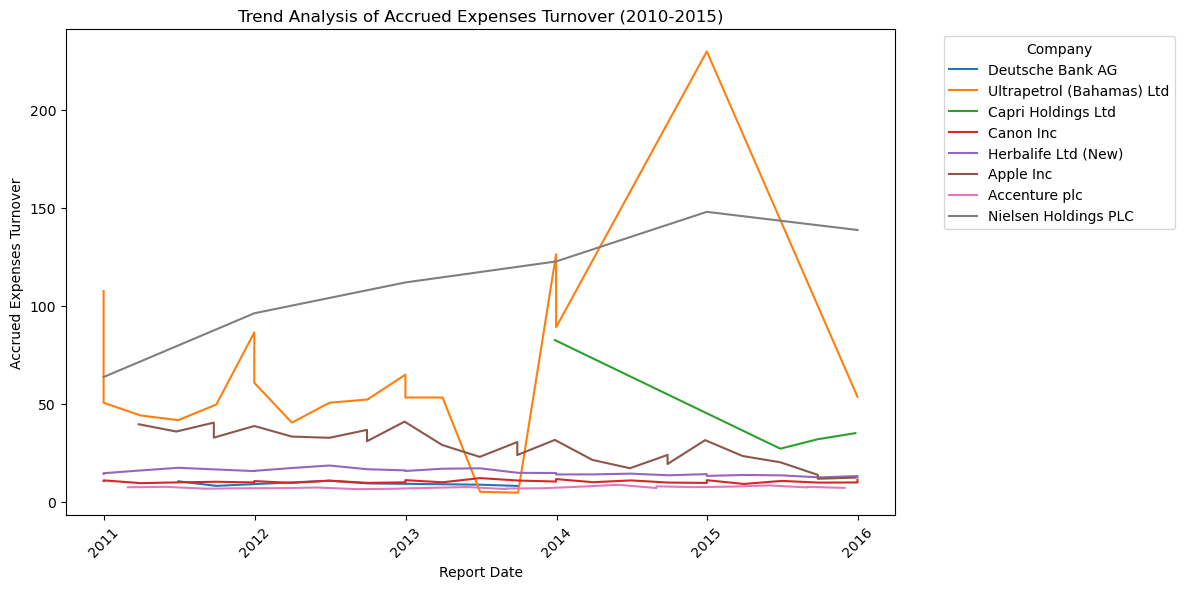

In [7]:

import matplotlib.pyplot as plt


# # Filter for the time period 2010 to 2015
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

# Selecting relevant columns. Assuming 'company_name' is the column with company names.
# Replace 'company_name', 'reportdate', and 'metric_value_column' with actual column names.
relevant_data = updated_df[['company_name', 'report_date', 'amount']].copy()

# Plotting the trend
plt.figure(figsize=(12, 6))

for company in relevant_data['company_name'].unique():
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], label=company)

plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
plt.xlabel('Report Date')
plt.ylabel('Accrued Expenses Turnover')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## Geographical Region Analysis



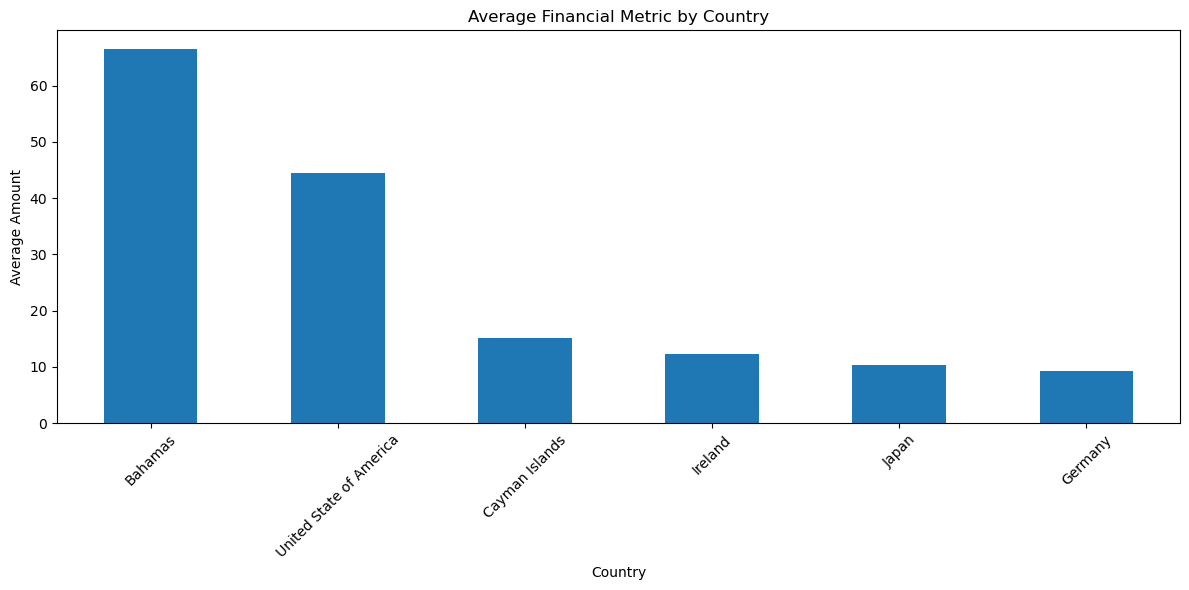

In [8]:
country_avg = updated_df.groupby('country_name')['amount'].mean()
# Plotting for Geographical Region Analysis
plt.figure(figsize=(12, 6))
country_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

